<!-- dom:TITLE: A example contraction model; Rice et al (2008) -->
# The contraction model of Rice et al (2008)
<!-- dom:AUTHOR: Joakim Sundnes -->
<!-- Author: -->  
**Notebook prepared by 

Joakim Sundnes**

Date: **Jun 21, 2018**

## Model outline

  * Rice, Wang, Bers, de Tombe: *Approximate Model of Cooperative Activation and Crossbridge Cycling in Cardiac Muscle Using Ordinary Differential Equations*, Biophysical journal, 2008. 

  * A hybrid model; 

    * Some model components described in great detail and biophysical rigour

    * Some components deliberately simplified and phenomenological, to keep complexity at a reasonable level


  * Conceptually simple (but the devil is in the details)

<!-- !split     -->
## Model states and equation
<!-- dom:FIGURE:[figs/rice_fig2.png, width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="figs/rice_fig2.png" width=600>

<!-- end figure -->

Calcium is considered an input variable, which activates and drives the cross bridge (XB) cycling system. The complete model has eight state variables, and can be viewed as three coupled sub-systems; one describing *calcium binding to Troponin C binding sites*, one describing *XB cycling*, and one describing *force development and length changes*. 

### Calcium binding to Troponin C (regulatory)
The binding of Ca to Troponin C is the driver for the rest of the system, and the main regulator of force development in the myocyte. There is also a feedback mechanism by which the mechanical state of the system affects calcium binding, since the binding rate is higher for binding sites with bound XBs nearby. In the model by Rice et al, this is handled by introducing two state variables for bound Ca; one describing Ca bound to low-affinity sites (without nearby XBs) and one describing binding to high-affinity sites, which are binding sites with nearby XBs:
+ $TRPN_{CaL}$ - calcium bound to low-affinity binding sites
+ $TRPN_{CaH}$ - calcium bound to high-affinity binding sites
These two variables regulate XB cycling, in that they affect the transition rate between the non-permissive and permissive state of a regulatory unit (RU, i.e. a binding site for a XB). An increase in $TRPN_{CaL}, TRPN_{CaH}$ leads to an increased transition rate to the permissive state, which initates the cycling. The relation is strongly non-linear to capture the effect of cooperativity (more details below). The binding is described by the following ODEs:
$$
\begin{align*}
\frac{dTRPN_{CaL}}{dt}  &= k_{onT} Ca_i (1 - TRPN_{CaL}) - k_{offLT} TRPN_{CaL} \\
\frac{dTRPN_{CaH}}{dt} &= k_{onT} Ca_i (1 - TRPNCaH) - k_{offHT} TRPN_{CaH} 
\end{align*}
$$


### States describing XB cycling
The following states describe the XB cycling:
+ $N_{NoXB}$, proportion of RUs in the non-permissive state
+ $P_{NoXB}$, proportion of RUs in the permissive state, without bound XBs
+ $XB_{PreR}$, proportion of RUs with a strongly bound cross bridge in the pre-rotation state, i.e. one that has not gone through the power stroke
+ $XB_{PostR}$, proportion of RUs with a strongly bound cross bridge in the post-rotation state, i.e. after the power stroke

The transitions between these states are  illustrated in the figure above (Figure 2 from Rice et al (2008)), and lead to the following ODEs: 

$$
\begin{align*}
%\frac{dN_{NoXB}}{dt} &= k_{pnT}P_{NoXB} - k_{npT} N_{NoXB} \\
%\frac{dP_{NoXB}}{dt} &= k_{npT}N_{NoXB} - k_{pnT}P_{NoXB} \\
\frac{dN}{dt} &= k_{pn}P - k_{npT}N \\
\frac{dP}{dt} &= k_{npT}N -k_{pn}P - f_{appT}P + g_{appT}XB_{prer} + g_{xbT}*XB_{postr}\\ 
\frac{dXB_{PreR}}{dt} &= f_{appT}P + h_{bT}XB_{postr} - (g_{appT} + h_{fT})XB_{prer} \\
\frac{dXB_{PostR}}{dt} &= h_{fT}XB_{prer} - (h_{bT}XB_{postr} + g_{xbT})*XB_{postr}
\end{align*}
$$

As noted above, the transitions between the permissive and non-permissive state are strongly dependent on the states $TRPN_{CaH}, TRPN_{CaL}$, effectively keeping all RUs in the non-permissive state when the concentration of bound Ca is low, and allowing transition to the permissive state when $TRPN_{CaH}, TRPN_{CaL}$ increase. 


### Force development
Force development in the Rice model follows a concept from Razumova et al (2009), where the cross-bridges are modeled as linear springs. Following the standard formula for a linear spring, the force $F_{XB}$ produced by a single XB is equal to the product of its stiffness ($k_{XB}$) and its distortion ($X$);
$$
F_{XB} = k_{XB}x .
$$
For a collection of XBs, the total force is proportional to the number of strongly bound XBs multiplied with their total stiffness and their average distortion. The model considers two populations of strongly bound XBs (pre- and post rotation), which leads to
$$
F \sim k_{XB}(XB_{PreR}xXB_{PreR} + XB_{PostR}xXB_{PostR})
$$
Here $xXB_{PreR},xXB_{PostR}$ are state variables describing the *average distortion* of the two populations of strongly bound XBs. The proportions of XBs occupying the two states ($XB_{PreR}$ and $xXB_{PostR}$) are given by the equations above, but we need to describe the dynamics of the XB distortions. The changes in XB distortion can come from two sources:
  * Lengthening or shortening a muscle will change the distortion of all strongly bound XBs, essentially either stretching or releasing the XBs. In the model this is incorporated by having XB distortions depend on $dSL/dt$, with $SL$ being sarcomere length.

  * As an XB goes through its cycle, moving through the power stroke from the pre- to post rotation state, this will change induce a distortion ($x_0$). 
 
Putting these two effects together, we get the following equations for the dynamics of XB distortion:

$$
\begin{align*}
\frac{dxXB_{prer}}{dt} &\sim \frac{dSL}{dt} + (-f_{appT}xXB_{prer} + hbT*(xXB_{postr} - (x_0 + xXB_{prer}))) \\
\frac{dxXB_{postr}}{dt} &\sim \frac{dSL}{dt} + h_{fT} (xXBprer + x_0 - xXBpostr) 
\end{align*}
$$

### Model artifacts and weaknesses
The model components outlined above are all based on sound physical principles, and offer a fairly intuitive explanation of how force is developed in the cell. However, in order to reproduce certain features of experimental results, without making the model overly complex, the published model contains a number of components and expressions
which are more phenomenological and lack an intuitive physical foundation. One example is the inclusion of an additional set of equations describing Ca binding, refered to as *apparent* Ca binding (as opposed to the *regulatory* binding outlined above). These two model parts describe the exact same physical process, but the *regulatory* version describes how it regulates contraction, while the *apparent* version describes the effect seen from the electrophysiology part of the model in terms of Ca buffering. While it is obvioiusly sub-optimal to include two different model formulations for the same process, it was done this way to avoid a too strong feedback from the mechanics part to the electrophysiology, and to keep the model reasonably simple. We refer to the original publication for the details on this and other less intuitive and physically reasonable concepts. 

The published paper and model code can be found here:
* [Rice et al 2008](rice_2008_biophys.pdf)
* [Model code in Python](rice_model_2008.py)

The code was auto-generated from CellML with a software called [Gotran](https://bitbucket.org/johanhake/gotran). The structure of the implementationmay be a little different from what you are used to, but the main components are the same:
* A function 'init_state_variables' sets the initial condition
* The function 'init_parameter_values' sets all parameters
* The functions 'state_indices', 'parameter_indices' and 'monitor_indices' provide a mapping from a parameter name to the right array index, which is useful for accessing the parameters.
* The function 'rhs' is the definition of the right hand side. This is the main function defining the ODE system, and is passed to the ODE integrator in the usual way.
* Finally, the function named 'monitored' is just a convenient function for extracting quantities of interest that are not state variables


## Classical cell mechanics experiments
In this section we demonstrate the model behavior on some classical cell mechanics experiments, essentially reproducing the figures from the results section of the original publication (Rice et al (2008)).

### Steady state F-Ca relations
Here we show the cooperative behavior of the model, i.e. the strongly non-linear relation between Ca concentration and developed force. The plot is produced by choosing a sequence of (constant) Ca concentrations, and for each of these run the ODE model until it reaches a steady state. (Recall that Ca is an input parameter to the model.)

For all sarcomere lengths, the F-Ca relation shows strong cooperativity, and can be fitted by a Hill curve:

$$
F = F_{max}\frac{Ca_i^n}{Ca_{50}^n + Ca_i^n} .
$$
Here $F_max$ is parameter scaling the maximum force, $Ca_{50}$ is the half-activation Ca concentration, and $n$ is the Hill parameter characterizing the steepness of the curve.

The code below loads an interactive widget for the Rice model, where the SL can be dynamically adjusted.  The solid blue line in the model is the F-Ca relation obtained by the model, while the two dashed lines are Hill curves with parameters $F_{max} = 0.17, Ca_{50} = 3.0, n = 7.6$, and
$F_{max} = 0.92, Ca_{50} = 0.87, n = 7.6$, respectively.

Try adjusting the SL value to see the effect on the F-Ca curve.

In [1]:
from ipywidgets import interact, FloatSlider, Dropdown
import Rice_widgets as widgets
import importlib

importlib.reload(widgets)
widget = widgets.Fig3AWidget()

The sliders marked $Fmax, Ca50$ and $n$ determine the shape of the third Hill curve (dotted line). For any value of SL, it should be possible to adjust these parameter values to fit the Hill curve to the model result. 

The figure above is essentially a dynamic version of Figure 3A of the original paper by Rice et al. The figure captures a number of characteristic features of the F-Ca relation in cardiomyocytes:
+ The strong cooperativity, in terms of the steep and strongly non-linear F-Ca curve
+ The maximum force depends strongly on the sarcomere length, stretching the cell leads to a higher force.
+ Although changing SL alters the maximum force, and shifts the Hill curve to the left (reduces $Ca_{50}$), the cooperativity expressed by the Hill parameter $n$ remains largely unchanged.

 ## Force-velocity relations
 
Another fundamental characteristic of both cardiac and skeletal muscle is the hyperbolic relation between force and shortening velocity. This feature was first described by Huxley, and should be captured by all realistic models of cardiac cell mechanics. The F-V relation can typically be described by a modified Hill curve of the form

$$
v = \frac{a v_{max}-bF}{F+a}.
$$
Here $v$ is shortening velocity, $F$ is the developed force (equal to the load applied to the cell), $v_{max}$ is the maximum shortening velocity (obtained for $F=0$), and $a,b$ are parameters that need to be fitted. 

The code below replicates a typical experimental setup to determine the F-V relation. The protocol is as follows:
+ First, the model is held at a fixed length (here $SL=2.2\mu m$) and Ca concentration is held at a constant high level until maximum activation is reached.
+ While in this steady state of maximum activation, the muscle is released, and allowed to contract against a constant force. The maximum shortening velocity is recorded.
These two steps are repeated for a number of values of the constant force, and the resulting relation between force and maximum velocity is plotted. 

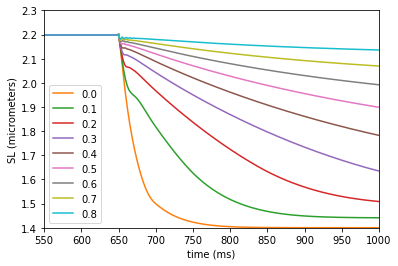

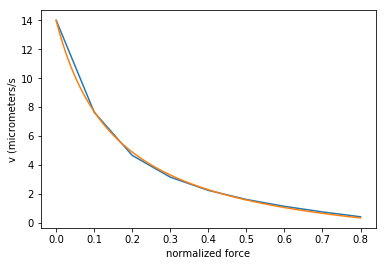

In [5]:
import rice_model_2008 as rice
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

#isometric for t<650:
t1 = np.linspace(0,650,101)
init = rice.init_state_values(SL=2.2)
SL_ind = rice.state_indices("SL")
p = (rice.init_parameter_values(start_time=1000,Ca_diastolic=10,SLmin=2.5),)
s1 = odeint(rice.rhs,init,t1,p)
plt.plot(t1,s1[:,SL_ind])

#release the cell, allow to contract against different (constant) loads:
al = np.linspace(0,0.8,9)
v = []
intf_ind = rice.state_indices('intf')
init = s1[-1,:]
init[intf_ind] = 0.0
t2 = np.linspace(650,1000,351)
for load in al:
    p = (rice.init_parameter_values(start_time=1000,Ca_diastolic=10,SEon=0,fixed_afterload=load),)
    s2 = odeint(rice.rhs,init,t2,p)
    v.append(-1000*(s2[50,SL_ind]-init[SL_ind])/50)
    plt.plot(t2,s2[:,SL_ind],label=str(load))

#set correct axes for figure 1:
plt.axis([550,1000,1.4,2.3])
plt.ylabel("SL (micrometers)")
plt.xlabel("time (ms)")
plt.legend()

#compute fitted Hill velocity:
f_hill = np.linspace(0,0.8,101)
a_hill = 0.16
b_hill = 2.4
v_max = 14
v_hill = (v_max*a_hill-b_hill*f_hill)/(f_hill+a_hill)

plt.figure(2)
plt.plot(al,v,label="Model")
plt.plot(f_hill,v_hill,label="Hill curve")
plt.ylabel("v (micrometers/s")
plt.xlabel("normalized force")

plt.show()




These are Figures 4A and 4B of the original Rice et al paper. 

The top panel (Figure 4A) shows how SL varies as the cell is released from its initial isometric and fully activated state, for different values of the load $F$. As expected, both the final steady state SL and the shortening velocity depend strongly on the applied load. 

The lower panel (Fig 4B) shows the F-V relation. The maximum shortening velocity is estimated by finite differences, for all the curves shown in the top panel. This velocity is then plotted against the corresponding load, and compared with a fitted Hill curve with parameters $v_{max} = 14, a = 0.16, b = 2.4$.

### The isometric twitch

Another classical cell mechanics experiment is the simple twitch, which involves stimulating a cell and measuring the output force. This experiment can be performed either under isometric conditions, where the cell length is fixed, or in a dynamic setting where the cell contracts against a fixed or varying load. Here we show an example of an isometric twitch, and show how the force transient depends on the sarcomere length. 

The protocol here is very simple. We choose a sequence of SL values in a suitable range, (here 1.8 $\mu m$ 
to 2.3 $\mu m$). For each SL value, hold it fixed while applying a stimulus to the cell. Since we here work with a pure mechanics model, applying a stimulus involves assigning a suitable, prescribed calcium transient. The following function, taken from the original Rice et al publication, is chosen to give a reasonable Ca twitch:

$$
Ca(t) = \left(\frac{Ca_{amplitude}-Ca_{diastolic}}{\beta}\right)\left(\exp(-\frac{t-t_{start}}{\tau_1} - \exp(-\frac{t-t_{start}}{\tau_1}\right) + Ca_{diastolic}
$$

if $t > t_{start}$, otherwise $Ca(t) = Ca_{diastolic}$.

In Python code, it may look like this:

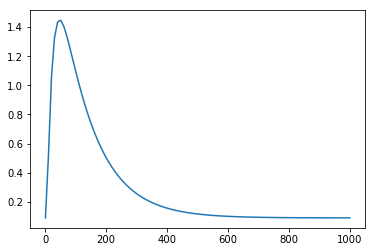

In [16]:
import math

Ca_amplitude=1.45
Ca_diastolic=0.09
start_time=5, 
tau1=20 
tau2=110
t = np.linspace(0,1000,101)

beta = -math.pow(tau1/tau2, -1/(1 - tau2/tau1)) + math.pow(tau1/tau2,\
        -1/(-1 + tau1/tau2))
Cai = ((-Ca_diastolic + Ca_amplitude)*(np.exp((start_time - t)/tau1) -\
        np.exp((start_time - t)/tau2))/beta + Ca_diastolic) 

#the following line implements the if test in numpy without a loop
Cai = Cai*(t>=start_time)+ Ca_diastolic*(t<start_time)

plt.plot(t,Cai)
plt.show()

The code for the full isometric twitch protocol, using the Ca transient defined above and a range of SL values from 1.8 $\mu m$ to 2.3 $\mu m$, is shown below. The resulting is a reproduction of Figure 5A of the Rice et al paper.

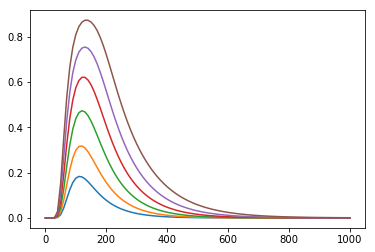

In [15]:
import rice_model_2008 as rice
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

t = np.linspace(0,1000,101)
SLvals = np.linspace(1.8,2.3,6)
p = rice.init_parameter_values(SLmin=2.5)
force_ind = rice.monitor_indices("active")     

for s in SLvals:
    init = rice.init_state_values(SL=s)
    s = odeint(rice.rhs,init,t,(p,))
    force = []
    for tn,sn in zip(t,s):
        m = rice.monitor(sn,tn,p)
        force.append(m[force_ind])
    plt.plot(t,force)

plt.show()

We see that the behavior is as we would expect from the steady state experiments above; increasing SL leads to a stronger and longer lasting force twitch. 

### Parameter adjustments
Finally, we can explore how different parameters affect the shape of the isometric force twitch. The full model has quite a few parameters, making it inconvenient to expose them all, but we can investigate the model's sensitivity to a few key parameters. Here, we expose SL, three parameters that determine the shape of the Ca transient (Ca_amplitude, tau1, tau2), and seven parameters affecting the transition rates of XB cycling. The model sketch above gives an overview of which reaction that is affected by each parameter. 

In [2]:
from ipywidgets import interact, FloatSlider, Dropdown
import Rice_widgets as widgets
import importlib

importlib.reload(widgets)
widget = widgets.Fig5Awidget()

### Exercise
As described above, the Rice model displays strong cooperativity, and the F-Ca relation is the characteristic steep Hill curve. Below is a piece of code that exposes the main parameters of the model, and plots the F-Ca relation for a single value of SL. Based on the model outline presented above, and the previous lecture on cell mechanics, try to answer the following questions:
* What are the key parameters regulating the steepness of the cooperative behavior? (Hint; identify the model component giving the cooperativity, look for a Hill curve)
* Can you remove the cooperative behavior by changing a single parameter?
* Can you think of a physical justification for the cooperativity formulation used in the model? If not, why do you think it was formulated in this way?


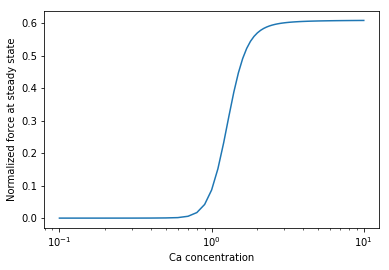

In [3]:
import rice_model_2008 as rice
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

t = np.linspace(0,100,101)
Cai = np.linspace(0,10,101)
force_index = rice.monitor_indices("active")

# Parameter names and default values:
# Qfapp=6.25, Qgapp=2.5, Qgxb=6.25, Qhb=6.25, Qhf=6.25, fapp=0.5,
# gapp=0.07, gslmod=6, gxb=0.07, hb=0.4, hbmdc=0, hf=2,
# hfmdc=5, sigman=1, sigmap=8, xbmodsp=1, KSE=1, PCon_c=0.02,
# PCon_t=0.002, PExp_c=70, PExp_t=10, SEon=1, SL_c=2.25,
# SLmax=2.4, SLmin=1.4, SLrest=1.85, SLset=1.9, fixed_afterload=0,
# kxb_normalised=120, massf=50, visc=3, Ca_amplitude=1.45,
# Ca_diastolic=0.09, start_time=5, tau1=20, tau2=110, TmpC=24,
# len_hbare=0.1, len_thick=1.65, len_thin=1.2, x_0=0.007,
# Qkn_p=1.6, Qkoff=1.3, Qkon=1.5, Qkp_n=1.6, kn_p=0.5,
# koffH=0.025, koffL=0.25, koffmod=1, kon=0.05, kp_n=0.05,
# nperm=15, perm50=0.5, xPsi=2, Trop_conc=70, kxb=120

init = rice.init_state_values()
Fss = np.empty_like(Cai)
for i in range(len(Cai)):
    #The following line sets the parameters. Simply add a parameter name and
    #its value to change it from the default.
    p = (rice.init_parameter_values(start_time=1000,Ca_diastolic=Cai[i],SLmin=2.5,nperm=1),)
    s = odeint(rice.rhs,init,t,p)
    m = rice.monitor(s[-1],t[-1],p[0])
    Fss[i] = m[force_index]
    
plt.semilogx(Cai,Fss)
plt.ylabel('Normalized force at steady state')
plt.xlabel('Ca concentration')

plt.show()
